In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv("/content/drive/MyDrive/colab_data/Expanded_data_with_more_features.csv")

In [7]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


drop unnamed column

In [11]:
df=df.drop('Unnamed: 0',axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


**gender distribution**

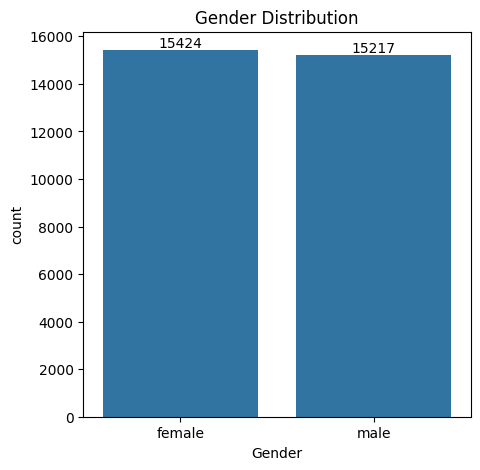

In [22]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

**from the above chart we have analysed that:**
the number of females in the data is more than the number of males

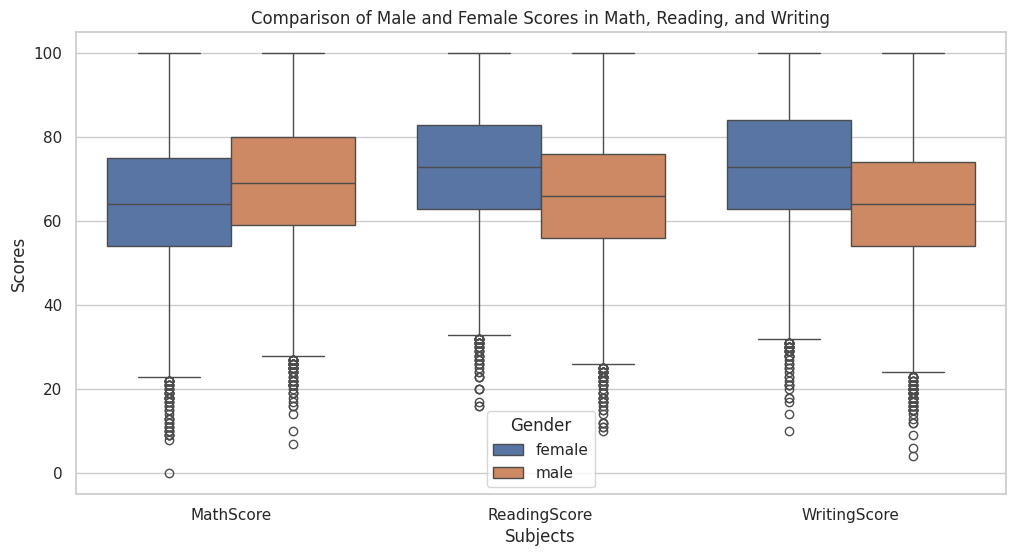

In [70]:


plt.figure(figsize=(12,6))
melted_data = df.melt(id_vars='Gender', value_vars=['MathScore', 'ReadingScore', 'WritingScore'],
                        var_name='Subject', value_name='Score')

sns.boxplot(x='Subject', y='Score', hue='Gender', data=melted_data)

plt.title('Comparison of Male and Female Scores in Math, Reading, and Writing')
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.show()


from the above chart we conclude that incase of ReadingScore and WritingScore of female students are higher than male students where as vice versa incase of MathScore

In [13]:
gb=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


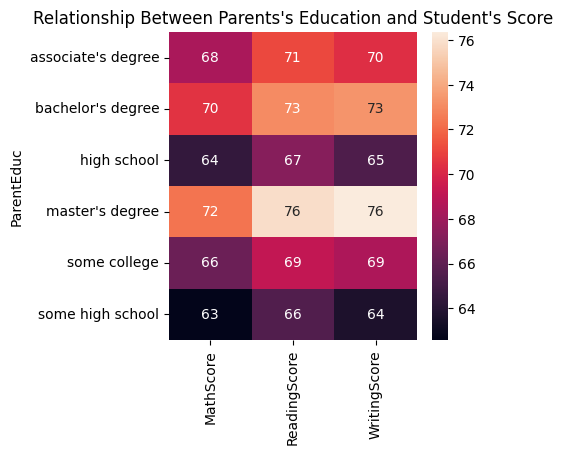

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.title("Relationship Between Parents's Education and Student's Score")
plt.show()

from the above chart we have concluded that the education of the parents have a good impact on their scores

In [17]:
gb1=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


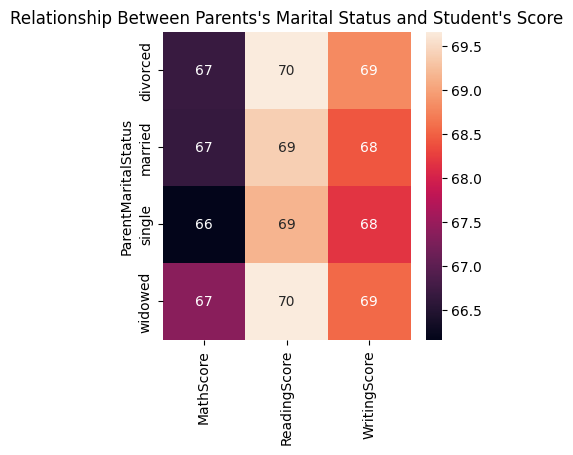

In [24]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1,annot=True)
plt.title("Relationship Between Parents's Marital Status and Student's Score")
plt.show()

from the above chart we concluded that there is no or negligible impact on the student's score due to their parents marital status

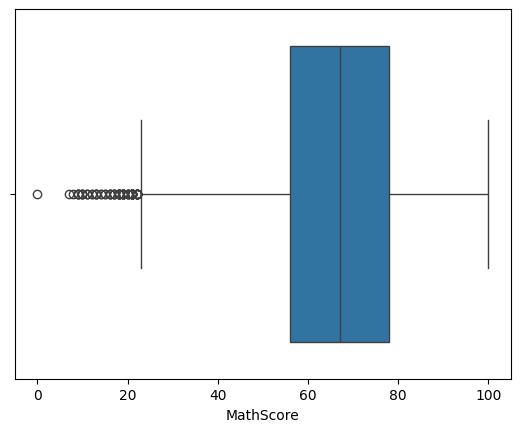

In [25]:
sns.boxplot(data=df,x='MathScore')
plt.show()

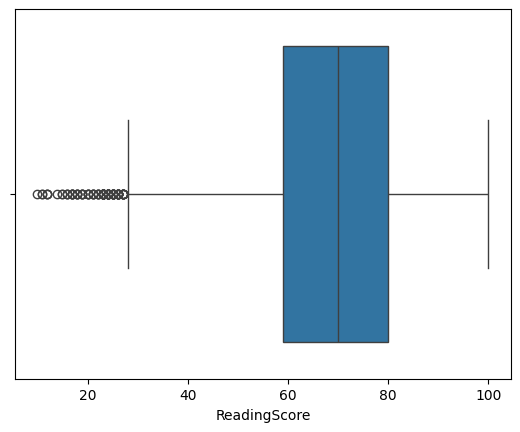

In [26]:
sns.boxplot(data=df,x='ReadingScore')
plt.show()

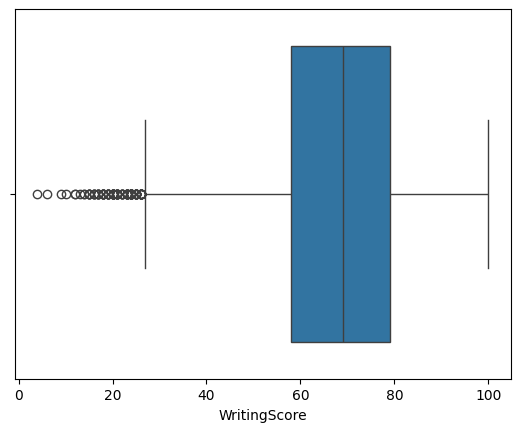

In [27]:
sns.boxplot(data=df,x='Writing Score')
plt.show()

In [28]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


**Distribution of Ethni Groups**

[2219, 5826, 9212, 7503, 4041]


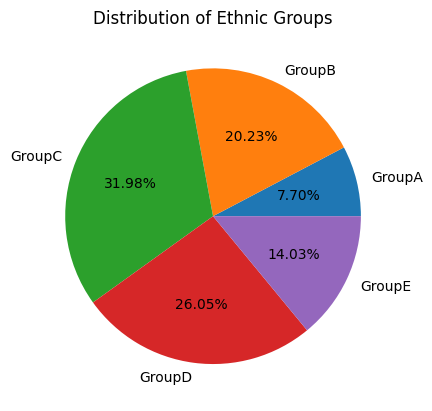

In [52]:
GroupA=df.loc[(df['EthnicGroup']=='group A')].count()
GroupB=df.loc[(df['EthnicGroup']=='group B')].count()
GroupC=df.loc[(df['EthnicGroup']=='group C')].count()
GroupD=df.loc[(df['EthnicGroup']=='group D')].count()
GroupE=df.loc[(df['EthnicGroup']=='group E')].count()

l=['GroupA','GroupB','GroupC','GroupD','GroupE']
mlist=[GroupA['EthnicGroup'],GroupB['EthnicGroup'],GroupC['EthnicGroup'],GroupD['EthnicGroup'],GroupE['EthnicGroup']]
print(mlist)
plt.pie(mlist,labels=l,autopct='%1.2f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

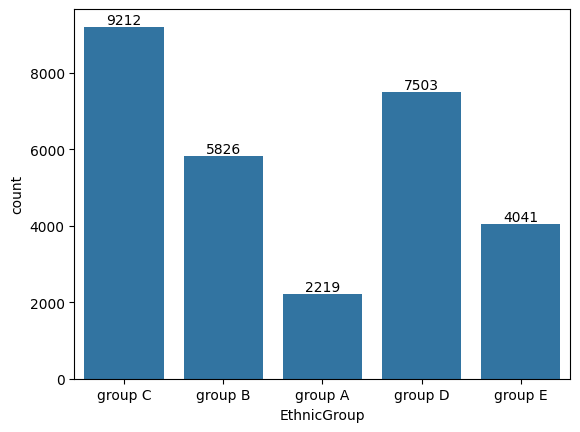

In [53]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])

In [57]:
gb2=df.groupby('WklyStudyHours').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb2)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


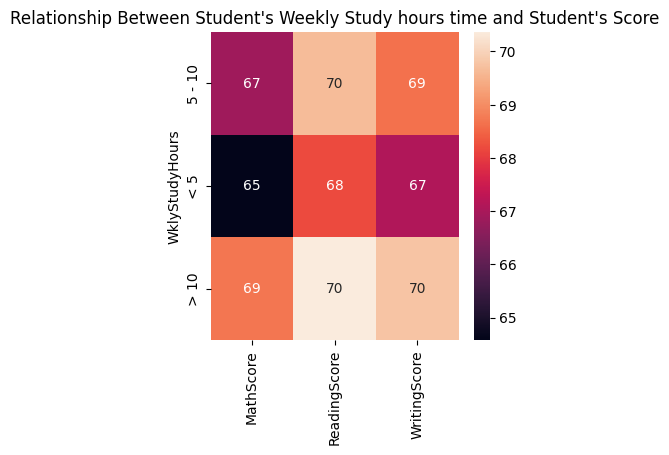

In [60]:
plt.figure(figsize=(4,4))
sns.heatmap(gb2,annot=True)
plt.title("Relationship Between Student's Weekly Study hours time and Student's Score")
plt.show()

from the above chart we conclude that students who study weekly 5-10 or more than 10 hours are have better scores compared to students who study less than 5 hours

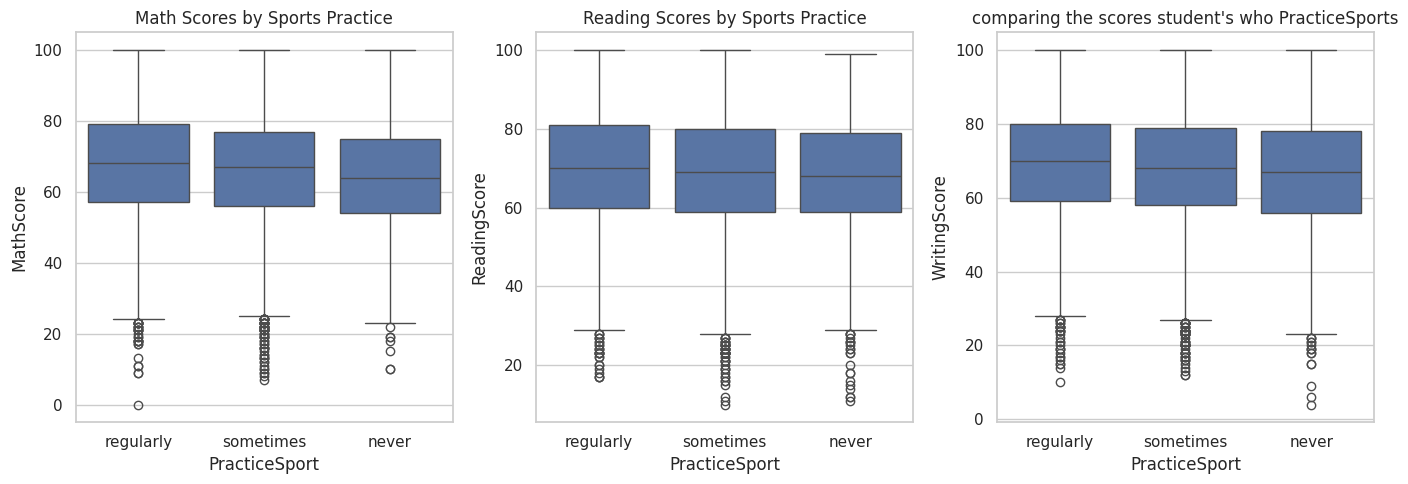

In [73]:


# Setting the theme for the plot
sns.set_theme(style="whitegrid")

# Plotting the comparison of Math, Reading, and Writing Scores by PracticeSport
plt.figure(figsize=(14, 5))

# Math Score comparison
plt.subplot(1, 3, 1)
sns.boxplot(x='PracticeSport', y='MathScore', data=df)
plt.title('Math Scores by Sports Practice')

# Reading Score comparison
plt.subplot(1, 3, 2)
sns.boxplot(x='PracticeSport', y='ReadingScore', data=df)
plt.title('Reading Scores by Sports Practice')

# Writing Score comparison
plt.subplot(1, 3, 3)
sns.boxplot(x='PracticeSport', y='WritingScore', data=df)
plt.title('Writing Scores by Sports Practice')

# Show the plot
plt.title("comparing the scores student's who PracticeSports")
plt.tight_layout()
plt.show()


could conclude that engaging in sports might contribute to better academic performance. If the differences are minimal, it might suggest sports practice has little effect on these particular academic outcomes.

# **CONCLUSION**
The data analysis reveals several important factors influencing student performance. Students with parents holding higher education degrees, particularly master's or bachelor's degrees, tend to score higher in all subjects, indicating a strong connection between parental education and academic success. Additionally, weekly study habits are crucial, as students who dedicate more than 10 hours to studying generally outperform those who study less than 5 hours. Test preparation programs also show a positive impact, with students who participate scoring higher across the board. While lunch type, which reflects socio-economic status, shows a minor effect, standard lunch students perform slightly better. On the other hand, the mode of transportation (e.g., school bus) does not significantly affect scores. Gender differences are observed, with female students excelling in Reading and Writing, though Math scores are more balanced. Lastly, regular sports practice seems to contribute to better or more consistent academic performance, suggesting that physical activity can positively influence learning. Overall, factors like parental education, study habits, and test preparation are key drivers of academic success.


